In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 

import warnings
warnings.filterwarnings('ignore')

In [103]:
food_prices = pd.read_csv('food.csv',sep=',', encoding='latin-1')

In [104]:
food_prices.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP


exploring the data

In [105]:
food_prices.shape

(743914, 18)

In [106]:
food_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743914 entries, 0 to 743913
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   adm0_id             743914 non-null  int64  
 1   adm0_name           743914 non-null  object 
 2   adm1_id             743914 non-null  int64  
 3   adm1_name           729965 non-null  object 
 4   mkt_id              743914 non-null  int64  
 5   mkt_name            743914 non-null  object 
 6   cm_id               743914 non-null  int64  
 7   cm_name             743914 non-null  object 
 8   cur_id              743914 non-null  int64  
 9   cur_name            743914 non-null  object 
 10  pt_id               743914 non-null  int64  
 11  pt_name             743914 non-null  object 
 12  um_id               743914 non-null  int64  
 13  um_name             743914 non-null  object 
 14  mp_month            743914 non-null  int64  
 15  mp_year             743914 non-nul

Checking for null values

In [107]:
food_prices.isnull().sum()

adm0_id                   0
adm0_name                 0
adm1_id                   0
adm1_name             13949
mkt_id                    0
mkt_name                  0
cm_id                     0
cm_name                   0
cur_id                    0
cur_name                  0
pt_id                     0
pt_name                   0
um_id                     0
um_name                   0
mp_month                  0
mp_year                   0
mp_price                  0
mp_commoditysource        0
dtype: int64

In [108]:
#filling forward since its a text value
food_prices = food_prices.fillna('ffill')

In [109]:
#to confirm null values removal
food_prices.isnull().sum()

adm0_id               0
adm0_name             0
adm1_id               0
adm1_name             0
mkt_id                0
mkt_name              0
cm_id                 0
cm_name               0
cur_id                0
cur_name              0
pt_id                 0
pt_name               0
um_id                 0
um_name               0
mp_month              0
mp_year               0
mp_price              0
mp_commoditysource    0
dtype: int64

In [110]:
#printing the number of unique food items
food_prices['cm_name'].nunique()

321

In [111]:
food_prices['cm_name'].unique()

array(['Bread', 'Wheat', 'Rice (low quality)', 'Wage (qualified labour)',
       'Livestock (sheep, one-year-old alive female)', 'Fuel (diesel)',
       'Exchange rate', 'Wage (non-qualified labour, non-agricultural)',
       'Rice', 'Beans (white)', 'Milk', 'Potatoes', 'Eggs',
       'Meat (chicken)', 'Sugar', 'Lentils', 'Pasta', 'Tomatoes', 'Oil',
       'Cheese (dry)', 'Carrots', 'Onions', 'Bananas', 'Tea',
       'Fuel (petrol-gasoline)', 'Fish (canned)', 'Apples',
       'Milk (camel)', 'Meat (camel)', 'Tea (sahm)', 'Wheat flour',
       'Oil (vegetable)', 'Rice (white)', 'Meat (pork)', 'Meat (beef)',
       'Cabbage', 'Apples (red)', 'Cucumbers (greenhouse)',
       'Fuel (kerosene)', 'Fish (fresh)', 'Bread (high grade flour)',
       'Bread (first grade flour)', 'Milk (non-pasteurized)',
       'Rice (coarse)', 'Lentils (masur)', 'Oil (palm)',
       'Rice (imported)', 'Sorghum', 'Maize (white)',
       'Cassava meal (gari)', 'Maize', 'Millet', 'Rice (local)',
       'Rice (impo

In [112]:
#printing the number of unique countries
print(food_prices['adm0_name'].nunique())
print(food_prices['adm0_name'].unique())

74
['Afghanistan' 'Algeria' 'Armenia' 'Azerbaijan' 'Bangladesh' 'Benin'
 'Bhutan' 'Bolivia' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Cape Verde' 'Central African Republic' 'Chad' 'Colombia' 'Congo'
 'Costa Rica' "Cote d'Ivoire" 'Democratic Republic of the Congo'
 'Djibouti' 'El Salvador' 'Ethiopia' 'Gambia' 'Georgia' 'Ghana'
 'Guatemala' 'Guinea-Bissau' 'Guinea' 'Haiti' 'Honduras' 'India'
 'Indonesia' 'Iran  (Islamic Republic of)' 'Iraq' 'Jordan' 'Kenya'
 'Kyrgyzstan' "Lao People's Democratic Republic" 'Lebanon' 'Lesotho'
 'Liberia' 'Madagascar' 'Malawi' 'Mali' 'Mauritania' 'Mozambique'
 'Myanmar' 'Nepal' 'Niger' 'Nigeria' 'Pakistan' 'Panama' 'Peru'
 'Philippines' 'Rwanda' 'Senegal' 'Somalia' 'Sri Lanka' 'Swaziland'
 'Syrian Arab Republic' 'Tajikistan' 'Timor-Leste' 'Turkey' 'Uganda'
 'Ukraine' 'United Republic of Tanzania' 'Yemen' 'Zambia' 'Zimbabwe'
 'State of Palestine' 'Sudan' 'Egypt' 'South Sudan']


In [113]:
print(food_prices['cur_name'].nunique())

61


Due to the difference in currencies, comparing prices of the countries will be inaccurate unless converted to a uniform currency. Considering the fact that there are 1 different unique currencies as shoen above, the other countries will be filtered out leaving Nigeria since that isthe focus of the prediction

In [114]:
food_prices = food_prices[food_prices['adm0_name'] == 'Nigeria']

In [115]:
#confirming the filtering 
print(food_prices['cur_name'].nunique())

1


In [116]:
food_prices['mp_price'].describe()

count    10406.000000
mean      8039.350270
std       9306.273337
min         55.500000
25%        200.000000
50%       5555.000000
75%      13668.500000
max      90000.000000
Name: mp_price, dtype: float64

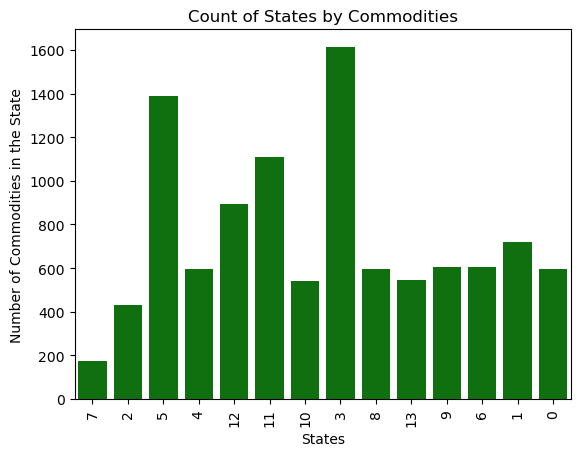

In [167]:
fig, ax = plt.subplots(1, 1)
states = food_prices[["cm_name", "adm1_name"]].groupby("adm1_name").agg(['count'])["cm_name"]['count'].sort_values(ascending=False)
fig = sns.barplot( x = states.index, y = states.values, ax = ax, color = 'green')
fig.set_xticklabels(labels=states.index , rotation=90)
fig.set_ylabel("Number of Commodities in the State")
fig.set_xlabel("States")
fig.set_title("Count of States by Commodities");

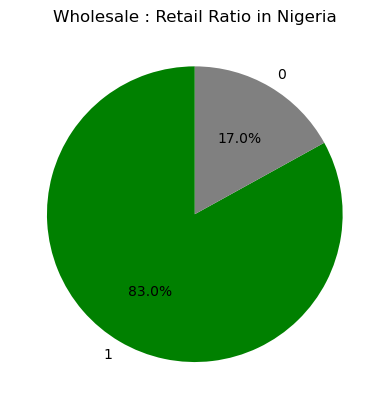

In [168]:
plt.pie(food_prices['pt_name'].value_counts(), labels=food_prices['pt_name'].value_counts().head().index, autopct='%1.1f%%',
        colors=['green', 'grey'],startangle=90)
plt.title('Wholesale : Retail Ratio in Nigeria');

Converting the Year and Month to Dates

In [121]:
food_prices["Date"] = [  y+ " " +x for x,y in list(zip(food_prices["mp_month"].astype(str).values, food_prices["mp_year"].astype(str).values)) ]
food_prices["Date"] = pd.to_datetime(food_prices["Date"])

In [122]:
food_prices.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource,Date
432161,182,Nigeria,65709,Sokoto,1037,Illela (CBM),51,Maize,95,NGN,14,Wholesale,5,KG,1,2002,153.3485,SIMA - Niger,2002-01-01
432162,182,Nigeria,65709,Sokoto,1037,Illela (CBM),51,Maize,95,NGN,14,Wholesale,5,KG,3,2002,171.2454,SIMA - Niger,2002-03-01
432163,182,Nigeria,65709,Sokoto,1037,Illela (CBM),51,Maize,95,NGN,14,Wholesale,5,KG,4,2002,188.3671,SIMA - Niger,2002-04-01
432164,182,Nigeria,65709,Sokoto,1037,Illela (CBM),51,Maize,95,NGN,14,Wholesale,5,KG,5,2002,189.0390,SIMA - Niger,2002-05-01
432165,182,Nigeria,65709,Sokoto,1037,Illela (CBM),51,Maize,95,NGN,14,Wholesale,5,KG,6,2002,187.8219,SIMA - Niger,2002-06-01


Encoding the string columns using label encoder

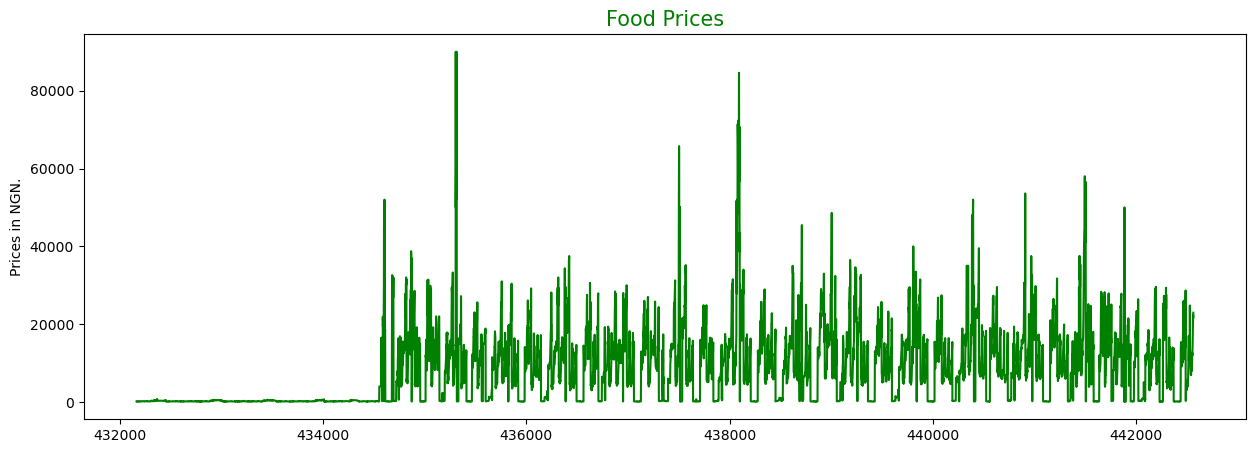

In [171]:

plt.figure(figsize=(15,5))
plt.plot(food_prices['mp_price'], color = 'green')
plt.title('Food Prices', fontsize=15, color = 'green')
plt.ylabel('Prices in NGN.')
plt.show()

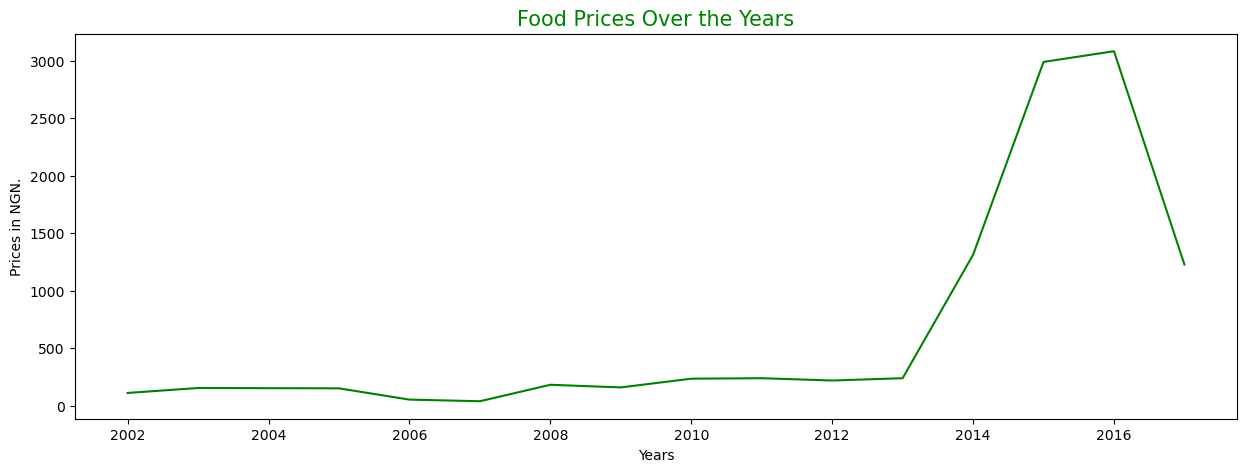

In [173]:
plt.figure(figsize=(15,5))
food = food_prices[["mp_price", "mp_year"]].groupby("mp_year").agg(['count'])
plt.plot(food, color = 'green')
plt.title('Food Prices Over the Years', fontsize=15, color = 'green')
plt.ylabel('Prices in NGN.')
plt.xlabel('Years')
plt.show()